In [48]:
import kaggle
import numpy as np
import pandas as pd
from PIL import Image
from fastai import *
import matplotlib.pyplot as plt
from fastai.vision.all import *
# import Timm

In [37]:
training_path = Path('training.csv')
testing_path = Path('test.csv')
lookup_path = Path('IdLookupTable.csv')
test_data = pd.read_csv(testing_path)
train_data = pd.read_csv(training_path)
lookup_data = pd.read_csv(lookup_path)

In [ ]:
train_data.head(2).T

In [39]:
train_data.shape

(7049, 31)

In [40]:
train_data.isnull().any().value_counts()

True     28
False     3
Name: count, dtype: int64

In [43]:
train_data.fillna(method = 'ffill',inplace = True)
# train_data.dropna(inplace=True)

/tmp/ipykernel_10746/53280154.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_data.fillna(method = 'ffill',inplace = True)


In [44]:
train_data.isnull().any().value_counts()

False    31
Name: count, dtype: int64

In [52]:
first_image = np.array([int(x) for x in train_data.Image[0].split()])
first_image = first_image.reshape(96,96)

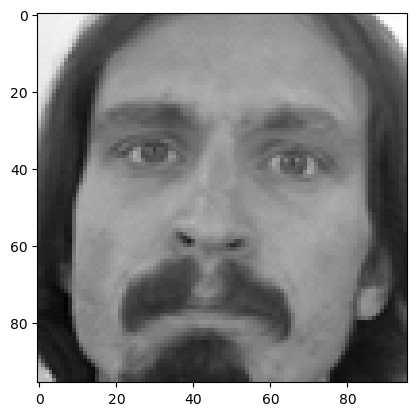

In [172]:
plt.imshow(first_image,cmap='grey')
plt.show()

In [96]:
all_images = []
for i in range(len(train_data)):
    img = train_data.Image[i].split()
    img = ['0' if x =='' else x for x in img]
    img = np.array(img, dtype=np.float32)
    img = np.array(img).reshape(96, 96)
    all_images.append(img)

In [97]:
all_images = np.array(all_images,dtype=np.float32)

In [103]:
training = train_data.drop('Image',axis=1)

In [104]:
training.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166


In [159]:
def plot_image(img_num):
    ax.set_title('Simple Image')
    return plt.imshow(all_images[img_num],cmap='grey')

def plot_image_with_keypts(img_num):
    keypoints=training.iloc[img_num,:]
    x__coord = keypoints[::2]
    y_coords = keypoints[1::2]
    fig,ax = plt.subplots()
    ax.imshow(all_images[img_num],cmap='grey')
    ax.scatter(x__coord,y_coords,color='green')
    ax.set_title('Image with Keypoints')
    return plt.show()

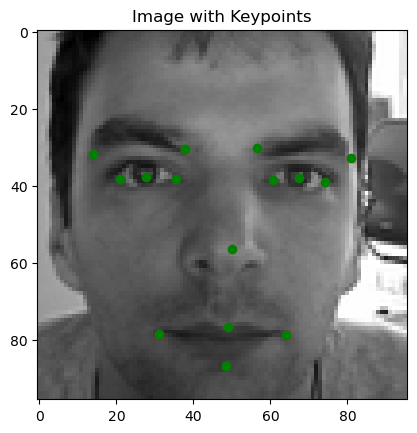

In [171]:
plot_image_with_keypts(250)

In [173]:
def get_keypoints(row):
    return tensor(row[::2]), tensor(row[1::2])